In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [12]:
import pandas as pd

from darts.timeseries import TimeSeries

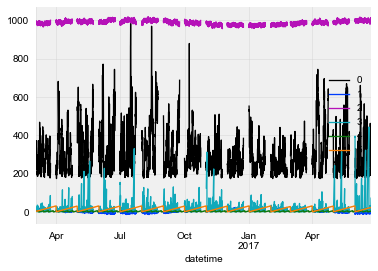

In [13]:
from math import floor
df = pd.read_csv('electricity-v-weather.csv')[-floor((24*365.25*1)):]
#df = pd.read_csv('electricity-v-weather.csv')
series = TimeSeries.from_dataframe(df, 'datetime', ['electricity_consumption', 'temperature', 'pressure', 'windspeed'])

series = series.add_datetime_attribute('weekday')
series = series.add_datetime_attribute('day')

series.plot()
plt.legend()
plt.show()

In [14]:
from darts.dataprocessing.transformers import MissingValuesFiller, Scaler

series = MissingValuesFiller(fill=0.0).transform(series)
series['0'].plot()

scaler = Scaler()
series = scaler.fit_transform(series)

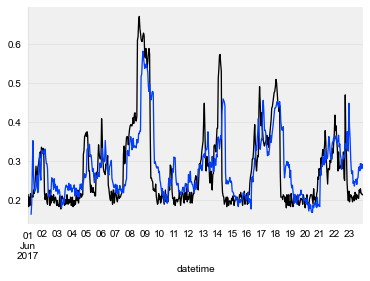

In [15]:
from darts.models import TCNModel

# Use previous week to predict next 6 hours
model = TCNModel(input_length=24*7,
                 input_size=6,
                 output_length=6,
                 output_size=1)

backtest = model.backtest(training_series=series,
                          target_series=series['0'],
                          start=pd.Timestamp('2017-06-01'),
                          forecast_horizon=6,
                          stride=1,
                          retrain=False,
                          use_full_output_length=True,
                          verbose=True)

series['0'][pd.Timestamp('2017-06-01'):].plot(label="actual")
backtest.plot(label="backtest")

In [18]:
from darts.metrics import mape

print(mape(series['0'], backtest))

19.40983137750883
